<a href="https://colab.research.google.com/github/andradeSerafim/my_creations/blob/main/Treli%C3%A7as_e_MRUV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sistema global de equação

In [ ]:
def inicial(matriz, n) -> list:
  x: list = []
  for i in range(n):
    #print(i, matriz[i][-1], matriz[i][i])  # Debug
    x.append(matriz[i][-1] / matriz[i][i])
    #print(x)  # Debug
  return x

# inicial([[10,2,1,7],[1,5,1,-8],[2,3,10,6]], 3)
# nao_satisfaz_criterio_de_linhas([[1,3,1,-2],[5,2,2,3],[0,6,8,-6]],3)
inicial([[4949.74746831, -4949.74746831, -4949.74746831, 1000],
         [-4949.74746831, 18949.7474683, 4949.74746831, 0],
         [-4949.74746831, 4949.74746831, 18949.7474683, 0]], 3)

[0.20203050891027205, 0.0, 0.0]

In [ ]:
def iteracao_para_terminar(x, novo_x, epsilon) -> bool:
  maior: int = 0
  novo_maior: int = 0
  for k in range(len(x)):
    maior = max(maior, abs(novo_x[k] - x[k]))
    novo_maior = max(novo_maior, abs(novo_x[k]))
    # print('novo_maior (em iteracao_para_terminar)', novo_maior)  # Debug
    # print('maior', maior)  # Debug
    # print('maior / novo_maior', maior / novo_maior)  # Debug
  return maior / novo_maior < epsilon

iteracao_para_terminar([3.0, 1.5], [1.450927734375, 12], 0.1)

False

In [ ]:
def nao_satisfaz_criterio_de_linhas(matriz, n) -> bool:
  for i in range(n):
    numerador: int = 0
    for j in range(n):
      if i != j:
        numerador += abs(matriz[i][j])
        # print('no numerador', matriz[i][j], i, j)
      else:
        denominador = abs(matriz[i][j])
        # print('no denominador', matriz[i][j], i, j)
    alfa = numerador/denominador 
    # print('alfa', alfa)
    if alfa > 1:
      return True
  return False

# nao_satisfaz_criterio_de_linhas([[10,2,1,7],[1,5,1,-8],[2,3,10,6]],3)
# nao_satisfaz_criterio_de_linhas([[1,3,1,-2],[5,2,2,3],[0,6,8,-6]],3)
nao_satisfaz_criterio_de_linhas([[4949.74746831, -4949.74746831, -4949.74746831, 1000],
                                 [-4949.74746831, 18949.7474683, 4949.74746831, 0],
                                 [-4949.74746831, 4949.74746831, 18949.7474683, 0]], 3)

True

In [ ]:
def gauss_jacobi(matriz, n, epsilon) -> list:
  mostrar_resultado: bool = True
  parada: bool = 0
  for v in matriz:
    for v2 in v:
      parada += abs(v2)
  # print("parada", abs(parada))  # Debug
  if nao_satisfaz_criterio_de_linhas(matriz, n):
    print("Não satisfaz o critério de linhas para o método de Gauss Jacobi.")
  x: list = inicial(matriz, n)
  # print("x (no começo:)", x)  # Debug
  # print()  # Debug
  novo_x = []
  for l in range(len(x)):
    novo_x.append(0)
  it = 0
  terminando: bool = False
  while not terminando:
    it += 1
    for i in range(n):
      novo_x[i] = matriz[i][-1]  
      # print('novo_x {} (em {})'.format(novo_x, i))  # Debug
      for j in range(n):
        if i != j:
          novo_x[i] -= matriz[i][j] * x[j] 
        # print('novo_x[i]', novo_x[i])  # Debug
      novo_x[i] /= matriz[i][i]
      if novo_x[i] > abs(parada):  # Evitando que fique um loop infinito.
        mostrar_resultado = False
        # print('erro')  # Debug
        break
    terminando = iteracao_para_terminar(x, novo_x, epsilon)
    # print('terminando', terminando)
    for l in range(len(x)):
      #print(l)  # Debug
      x[l] = novo_x[l]
    # print('x (depois)',x)  # Debug
    # print()  # Debug
  print('Fim de Gauss_Jacobi')
  if mostrar_resultado:
    return x
  else:
    print('Não foi possível encontrar solução pelo método de Gauss Jacobi.')


# gauss_jacobi([[2,1,6],[4,8,12]], 2, 0.01)
# gauss_jacobi([[1,1,3],[1,-3,-3]], 2, 0.01)
# gauss_jacobi([[1,-3,-3],[1,1,3]], 2, 0.01)
# gauss_jacobi([[10,2,1,7],[1,5,1,-8],[2,3,10,6]], 3, 0.05)
# gauss_jacobi([[4,5,67],[2,1,3,5],[6,1,9,8]], 3, 0.05)
# gauss_jacobi([[1,3,1,-2],[5,2,2,3],[0,6,8,-6]], 3, 0.01)
# gauss_jacobi([[5,2,2,3],[1,3,1,-2],[0,6,8,-6]], 3, 0.0001)
gauss_jacobi([[4949.74746831, -4949.74746831, -4949.74746831, 1000],
              [-4949.74746831, 18949.7474683, 4949.74746831, 0],
              [-4949.74746831, 4949.74746831, 18949.7474683, 0]], 3, 0.00001)
# gauss_jacobi([[1,5,6,8],[6,2,4,4],[3,9,6,5]],3,0.01)
# gauss_jacobi([[5,1,1,5],[3,4,1,6],[3,3,6,0]], 3, 0.01)
# gauss_jacobi([[1,0.5,-0.1,0.1,0.2],[0.2,1,-0.2,-0.1,-2.6],
#               [-0.1,-0.2,1,-0.2,1],[0.1,0.3,0.2,1,-2.5]], 4, 0.0001)
# gauss_jacobi([[3,0,1,3],[1,-1,0,1],[3,1,2,9]], 3, 0.00001)
# gauss_jacobi([[-8,1,1,1],[1,-5,1,16],[1,1,-4,7]], 3, 0.0001)

Não satisfaz o critério de linhas para o método de Gauss Jacobi.
Fim de Gauss_Jacobi


[0.34488916467817976, 0.07142791703084986, 0.07142791703084986]

In [ ]:
n =int(input('Dimensão do sistema linear:'))
epsilon = float(input('Critério de erro mínimo:'))

matriz = []
for i in range(n):
  criando_linha = input().split()
  for cada_numero in range(len(criando_linha)):
    #print(cada_numero)  # Debug
    #print(type(cada_numero))  # Debug
    criando_linha[cada_numero] = float(criando_linha[cada_numero])
  #print(criando_linha)  # Debug
  matriz.append(criando_linha)


# matriz = criando_matriz(n)
gauss_jacobi(matriz, n, epsilon)

Dimensão do sistema linear:3
Critério de erro mínimo:0.05
4949.74746831 -4949.74746831 -4949.74746831 1000
-4949.74746831 18949.7474683 4949.74746831 0
-4949.74746831 4949.74746831 18949.7474683 0
Não satisfaz o critério de linhas para o método de Gauss Jacobi.
Fim de Gauss_Jacobi


[0.33635848518427935, 0.07459895750010392, 0.07459895750010392]

Movimento retilíneo uniformemente variado

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple

In [ ]:
def mruv(aceleracao, velocidade, inicio, tempo) -> list:
  final = inicio + velocidade * tempo + 0.5 * aceleracao * tempo ** 2
  return final


# print(np.arange(0, 2, 0.1))
mruv(100, -9, 0, np.arange(0, 20))

array([    0.,    41.,   182.,   423.,   764.,  1205.,  1746.,  2387.,
        3128.,  3969.,  4910.,  5951.,  7092.,  8333.,  9674., 11115.,
       12656., 14297., 16038., 17879.])

In [ ]:
def velocidade_momentanea(aceleracao, velocidade, tempo) -> list:
  velocidade_nesse_momento = velocidade + aceleracao * tempo
  return velocidade_nesse_momento


velocidade_momentanea(-5, 2, np.arange(0, 20))

array([  2,  -3,  -8, -13, -18, -23, -28, -33, -38, -43, -48, -53, -58,
       -63, -68, -73, -78, -83, -88, -93])

In [ ]:
def limite_de_iteracoes(aceleracao, velocidade, inicio) -> int:
  if abs(aceleracao) < 1 and aceleracao != 0:
    aceleracao = 1 / aceleracao
  if abs(velocidade) < 1 and velocidade != 0:
    velocidade = 1 / velocidade
  limite_de_iteracao = int(abs(10 * aceleracao * velocidade + abs(inicio)))
  return limite_de_iteracao


limite_de_iteracoes(-100, -9, 0)

9000

In [ ]:
Vector = Tuple[list, list, bool]


def intervalo_da_raiz(aceleracao, velocidade, inicio) -> Vector:
  lista_de_resultados = []
  limite_de_iteracao = limite_de_iteracoes(aceleracao, velocidade, inicio)
  # print('limite_de_iteracao', limite_de_iteracao)  # Debug

  i = 0
  procura_de_sinal_oposto = True
  while procura_de_sinal_oposto:
    lista_de_resultados.append(mruv(aceleracao, velocidade, inicio, i))
    # print(i, lista_de_resultados)  # Debug
    if i > 0:
      if lista_de_resultados[i] * lista_de_resultados[i - 1] <= 0:
        fa, fb = lista_de_resultados[i - 1], lista_de_resultados[i]
        a, b = (i - 1), i
        # print(a, b)  # Debug
        return [fa, fb], [a, b], True
    i += 1
    if i > limite_de_iteracao:
      print('Impossível achar uma solução satisfatória')
      print('Pois nunca alcançará o ponto estudado.')
      fa = lista_de_resultados[int(limite_de_iteracao - 1)]
      fb =lista_de_resultados[int(limite_de_iteracao)]
      a, b = (limite_de_iteracao - 1), limite_de_iteracao
      return [fa, fb], [a, b], False


ponto_fa_fb, pontos_a_b, ha_raiz = intervalo_da_raiz(100, -9, 0)
ponto_fa_fb, pontos_a_b, ha_raiz

([0.0, 41.0], [0, 1], True)

In [ ]:
def condicao_suficiente(pontos_a_b, aceleracao, velocidade, erro) -> bool:

  partida = pontos_a_b[0]
  fim = pontos_a_b[1]
  while partida <= fim - erro:
    vel_1: float = velocidade_momentanea(aceleracao, velocidade, partida)
    vel_2: float = velocidade_momentanea(aceleracao, velocidade, partida + erro)
    # print(vel_2)

    if vel_2 == 0 and vel_1 * vel_2 < 0:
      print('O método de Newton-Raphson não é suficiente.')
      return False
    partida += erro
  # print()  # DEbug
  return True


condicao_suficiente([1.0, 2.0], -5, 2, 0.1)

True

In [ ]:
def extremo_escolhido(aceleracao, pontos_a_b, ponto_fa_fb) -> float:
  if ponto_fa_fb[0] * aceleracao > 0:
    return pontos_a_b[0]
  else:
    return pontos_a_b[1]

extremo_escolhido(-5, [1.0, 2.0], [4.5, -1.0])

2.0

In [ ]:
def newton_raphson(pontos_a_b, aceleracao, velocidade, inicio, erro) -> float:
  # ponto_fa_fb, pontos_a_b = intervalo_da_raiz(aceleracao, velocidade, inicio)
  if condicao_suficiente(pontos_a_b, aceleracao, velocidade, erro):
    x0: float = extremo_escolhido(aceleracao, pontos_a_b, ponto_fa_fb)
    # print(x0)  # Debug
    fora_do_erro: bool = True

    x_novo: float = x0 - (mruv(aceleracao, 
                        velocidade, 
                        inicio, 
                        x0) / velocidade_momentanea(aceleracao, 
                                                    velocidade, 
                                                    x0))
    # print(x_novo)  # Debug
    while fora_do_erro:
      x_antes: float = x_novo
      x_novo = x_novo - (mruv(aceleracao, 
                              velocidade, 
                              inicio, 
                              x_novo) / velocidade_momentanea(aceleracao, 
                                                              velocidade, 
                                                              x_novo))
      # print(x_novo)  # Debug
      if abs(x_antes - x_novo) < erro:
        fora_do_erro = False
        return x_novo

newton_raphson([0, 1], 100, -9, 0 - 0, 0.01)

0.18031482899325726

Formato da MRUV:
0.5 * aceleracao * tempo ^ 2 + velocidade * tempo + inicio
Digite a aceleração do ponto em m/s²:1
Digite a velocidade inicial do ponto em m/s:1
Digite a altura inicial do ponto em m:1
Digite a posição de chegada em m:0
Digite o erro máximo: 0.1
Impossível achar uma solução satisfatória
Pois nunca alcançará o ponto estudado.
A posição chegará a um tempo indeterminado.


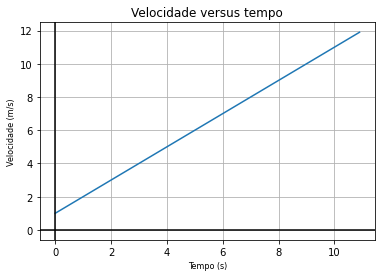

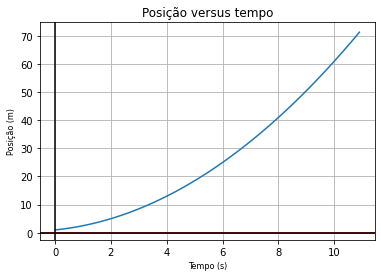

In [ ]:
print('Formato da MRUV:')
print('0.5 * aceleracao * tempo ^ 2 + velocidade * tempo + inicio')

aceleracao = float(input('Digite a aceleração do ponto em m/s²:').strip())
velocidade = float(input('Digite a velocidade inicial do ponto em m/s:').strip())
inicio = float(input('Digite a altura inicial do ponto em m:').strip())
posicao = float(input('Digite a posição de chegada em m:').strip())
erro = float(input('Digite o erro máximo: ').strip())
if erro <= 0:
  print('O erro não deve ser nulo e nem negativo.')

ponto_fa_fb, pontos_a_b, ha_raiz = intervalo_da_raiz(aceleracao, 
                                                     velocidade, 
                                                     inicio - posicao)
# print(ponto_fa_fb, pontos_a_b) # Debug
limite_de_iteracao = limite_de_iteracoes(aceleracao, velocidade, inicio)
# print(limite_de_iteracao)  # Debug

if not ha_raiz:
  resultado = limite_de_iteracao
  print('A posição chegará a um tempo indeterminado.')
  tempos = np.arange(0, limite_de_iteracao, erro)
else: 
  resultado = newton_raphson(pontos_a_b, 
                             aceleracao, 
                             velocidade, 
                             inicio - posicao, 
                             erro)
  tempos = np.arange(0, resultado + 10 * erro, erro)
  print("A posição estará no tempo de", resultado, "s")



# start = float(input('Digite o valor inicial do tempo:'))
# stop = float(input('Digite o valor final do tempo:'))
# tempos = np.arange(start, stop, erro)


# print(tempos)  # Debug

plt.grid()
plt.plot(tempos,velocidade_momentanea(aceleracao, velocidade, tempos))
plt.axvline(0, color='k')
plt.axhline(0, color='k')
plt.title('Velocidade versus tempo')
plt.xlabel('Tempo (s)', size= 8)
plt.ylabel('Velocidade (m/s)', size= 8)
plt.show()

plt.grid()
plt.plot(tempos, mruv(aceleracao, velocidade, inicio, tempos))
plt.axhline(posicao, color='r')
plt.axvline(0, color='k')
plt.axhline(0, color='k')
plt.title('Posição versus tempo')
plt.xlabel('Tempo (s)', size= 8)
plt.ylabel('Posição (m)', size= 8)
if ha_raiz:
  plt.plot(resultado, posicao, 'ro')
plt.show()